<a href="https://colab.research.google.com/github/kalyankargouri/machine-learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --quiet pandas numpy scikit-learn

import pandas as pd

csv_path = '/content/drive/MyDrive/MachineLearning/train.csv'
df = pd.read_csv(csv_path)
print(df.columns)

Index(['x', 'y'], dtype='object')


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression


X=df[['x']].values #shape(n,1)
Y=df['y'].values #shape(n, )

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [5]:
w=0.0
b=0.0

learning_rate=0.0001
epochs=1000

def for_propagation(X,w,b):
  z=X.flatten()*w+b
  return z

def compute_cost(Y_true,Y_pred):
  m=len(Y_true)
  cost=(1/(2*m)) * np.sum((Y_pred-Y_true)**2)
  return cost


def compute_gradient(X,Y_true,Y_pred):
  m=len(Y_true)
  dw=(1/m) * np.dot(X.T,(Y_pred-Y_true))
  db=(1/m) * np.sum(Y_pred-Y_true)
  return dw,db

In [8]:
for epoch in range(epochs):
    Y_pred_train = for_propagation(X_train, w, b)
    cost = compute_cost(Y_train, Y_pred_train)

    # Check for NaN in cost and break if necessary
    if np.isnan(cost):
        print(f"Epoch {epoch}: Cost is NaN. Stopping training.")
        break

    dw, db = compute_gradient(X_train, Y_train, Y_pred_train)

    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost}")

Y_pred_test = for_propagation(X_test, w, b)

test_cost = compute_cost(Y_test, Y_pred_test)
print(f"Test Cost: {test_cost}")

Epoch 0: Cost is NaN. Stopping training.
Test Cost: nan


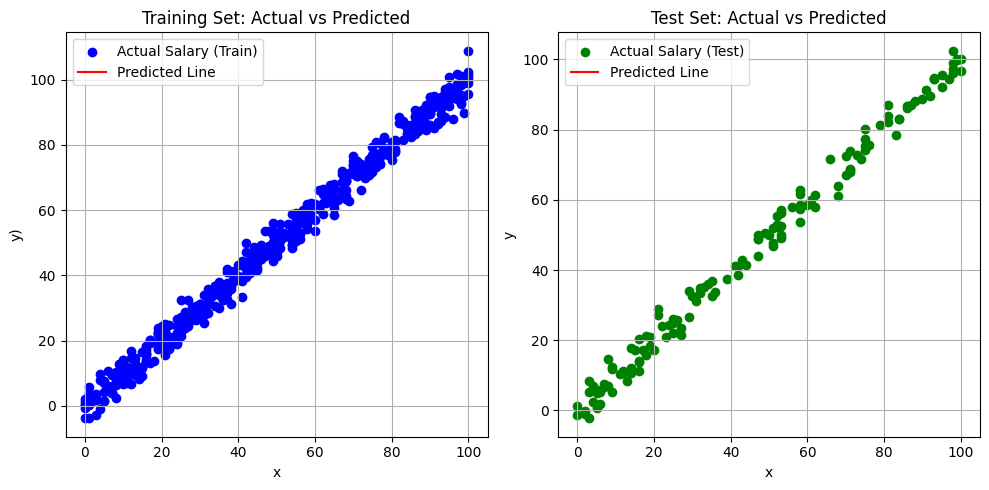

In [17]:
import matplotlib.pyplot as plt

# Predict using trained model
Y_pred_train = for_propagation(X_train, w, b)
Y_pred_test = for_propagation(X_test, w, b)

# 1. Plot for Training Data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, Y_train, color='blue', label='Actual Salary (Train)')
plt.plot(X_train, Y_pred_train, color='red', label='Predicted Line')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y)')
plt.legend()
plt.grid(True)

# 2. Plot for Test Data
plt.subplot(1, 2, 2)
plt.scatter(X_test, Y_test, color='green', label='Actual Salary (Test)')
plt.plot(X_test, Y_pred_test, color='red', label='Predicted Line')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In the plots above, the red line represents the **Predicted Line**, which is the best-fit line determined by the linear regression model.

*   In the **Training Set: Actual vs Predicted** plot on the left, the red line shows the model's predictions for the training data.
*   In the **Test Set: Actual vs Predicted** plot on the right, the red line shows the model's predictions for the test data.

This line represents the linear relationship that the model found between 'x' and 'y'.